# Insurance Claim Fraud Detection

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


In [4]:
# Display the general information of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   328                       999 non-null    int64  
 1   48                        999 non-null    int64  
 2   521585                    999 non-null    int64  
 3   17-10-2014                999 non-null    object 
 4   OH                        999 non-null    object 
 5   250/500                   999 non-null    object 
 6   1000                      999 non-null    int64  
 7   1406.91                   999 non-null    float64
 8   0                         999 non-null    int64  
 9   466132                    999 non-null    int64  
 10  MALE                      999 non-null    object 
 11  MD                        999 non-null    object 
 12  craft-repair              999 non-null    object 
 13  sleeping                  999 non-null    object 
 14  husband   

In [5]:
# Renaming columns
data.columns = [
    'months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
    'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
    'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship',
    'capital_gains', 'capital_loss', 'incident_date', 'incident_type', 'collision_type',
    'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location',
    'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
    'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim',
    'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported'
]

# Display summary statistics
print(data.describe(include='all'))

# Convert date columns to datetime
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], format='%d-%m-%Y')
data['incident_date'] = pd.to_datetime(data['incident_date'], format='%d-%m-%Y')

# Convert 'fraud_reported' to a binary variable
data['fraud_reported'] = data['fraud_reported'].apply(lambda x: 1 if x == 'Y' else 0)

# Check the data types again after conversion
print(data.dtypes)


        months_as_customer         age  policy_number policy_bind_date  \
count           999.000000  999.000000     999.000000              999   
unique                 NaN         NaN            NaN              950   
top                    NaN         NaN            NaN       05-08-1992   
freq                   NaN         NaN            NaN                3   
mean            203.829830   38.938939  546263.326326              NaN   
std             115.103809    9.140370  257190.576942              NaN   
min               0.000000   19.000000  100804.000000              NaN   
25%             115.500000   32.000000  335913.500000              NaN   
50%             199.000000   38.000000  533940.000000              NaN   
75%             276.000000   44.000000  759459.500000              NaN   
max             479.000000   64.000000  999435.000000              NaN   

       policy_state policy_csl  policy_deductable  policy_annual_premium  \
count           999        999     

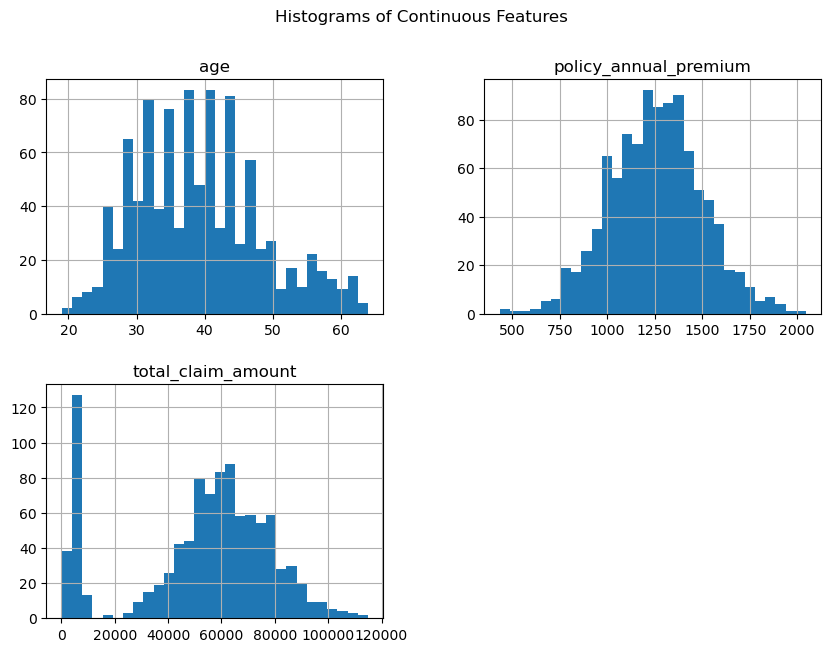

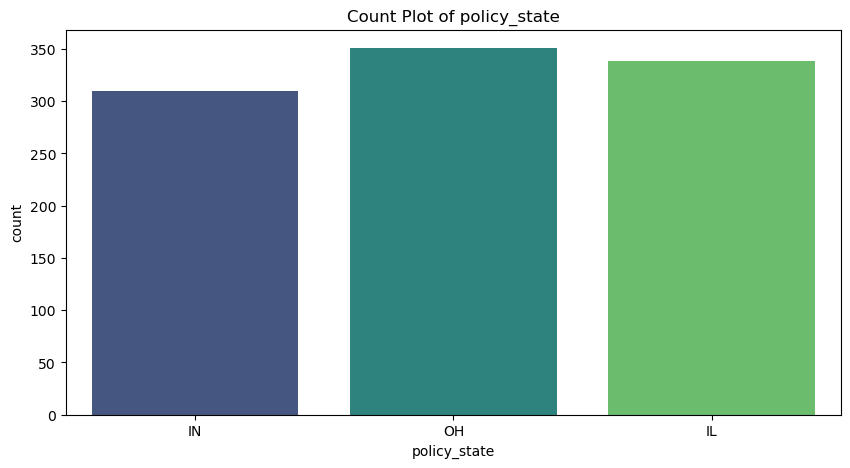

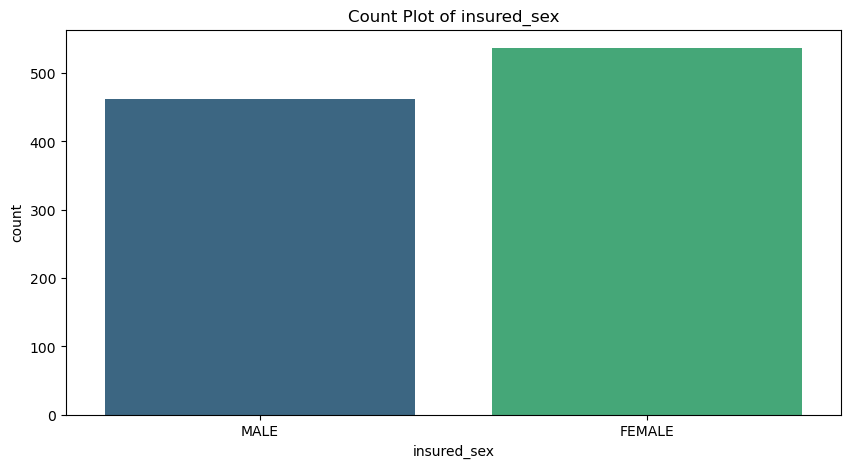

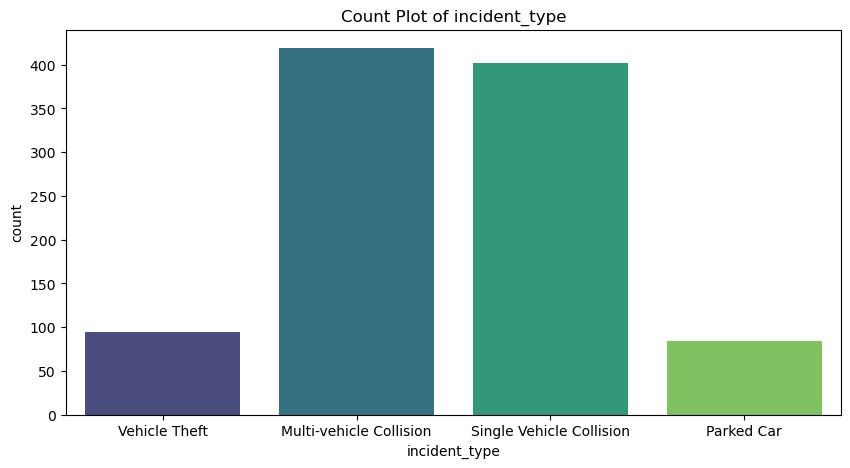

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7204\1866308666.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


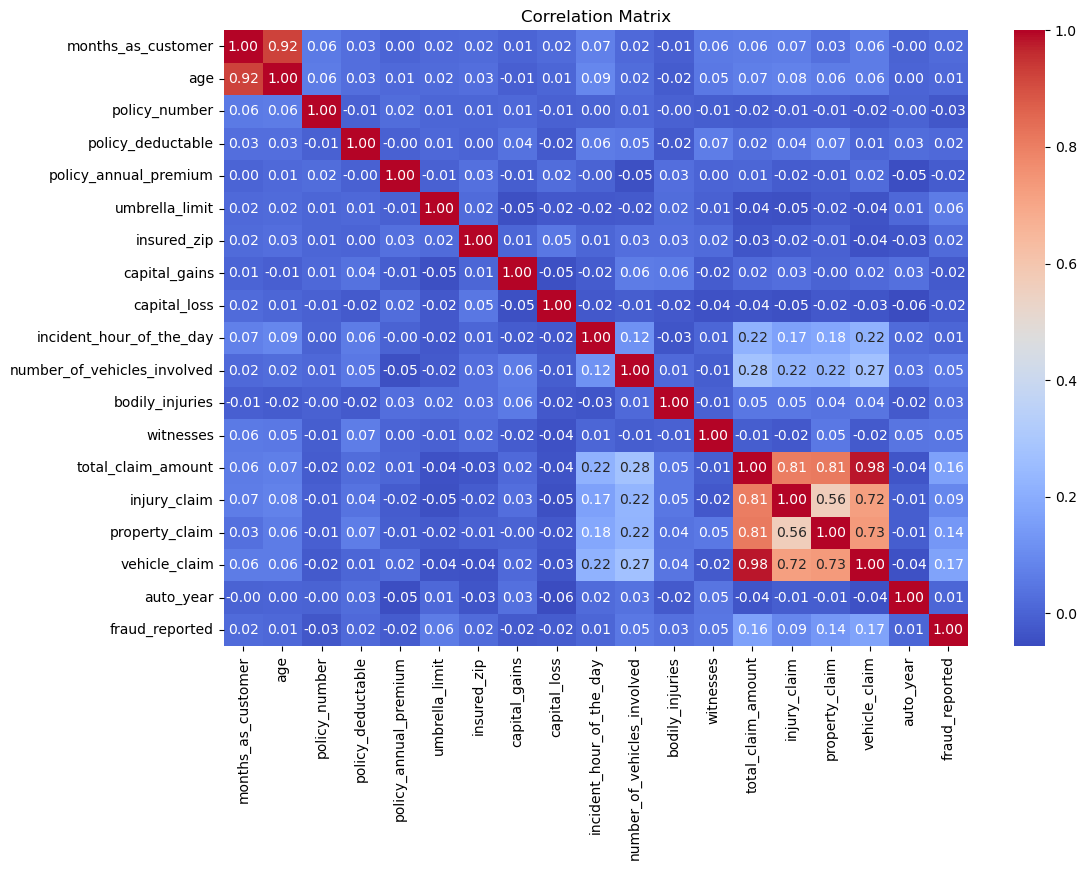

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for continuous features
continuous_features = ['age', 'policy_annual_premium', 'total_claim_amount']
data[continuous_features].hist(bins=30, figsize=(10, 7))
plt.suptitle('Histograms of Continuous Features')
plt.show()

# Bar plots for categorical features
categorical_features = ['policy_state', 'insured_sex', 'incident_type']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=feature, palette='viridis')
    plt.title(f'Count Plot of {feature}')
    plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
# Load the dataset
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv'
data = pd.read_csv(url)

# Renaming columns
data.columns = [
    'months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
    'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
    'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship',
    'capital_gains', 'capital_loss', 'incident_date', 'incident_type', 'collision_type',
    'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location',
    'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
    'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim',
    'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported'
]

# Convert date columns to datetime
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], format='%d-%m-%Y')
data['incident_date'] = pd.to_datetime(data['incident_date'], format='%d-%m-%Y')

# Convert 'fraud_reported' to a binary variable
data['fraud_reported'] = data['fraud_reported'].apply(lambda x: 1 if x == 'Y' else 0)


In [9]:
# Feature Engineering: Extracting day, month, and year from date columns
data['policy_bind_day'] = data['policy_bind_date'].dt.day
data['policy_bind_month'] = data['policy_bind_date'].dt.month
data['policy_bind_year'] = data['policy_bind_date'].dt.year
data['incident_day'] = data['incident_date'].dt.day
data['incident_month'] = data['incident_date'].dt.month
data['incident_year'] = data['incident_date'].dt.year

# Drop original date columns
data.drop(['policy_bind_date', 'incident_date'], axis=1, inplace=True)

# Splitting data into features and target
X = data.drop(['fraud_reported'], axis=1)
y = data['fraud_reported']

# Preprocessing: Numerical and Categorical Pipelines
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])


In [10]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and evaluating models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Fit and evaluate each model
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

Model: Logistic Regression
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       153
           1       0.58      0.53      0.56        47

    accuracy                           0.80       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.79      0.80      0.80       200

[[135  18]
 [ 22  25]]

--------------------------------------------------

Model: Random Forest
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       153
           1       0.14      0.02      0.04        47

    accuracy                           0.74       200
   macro avg       0.45      0.49      0.44       200
weighted avg       0.62      0.74      0.66       200

[[147   6]
 [ 46   1]]

--------------------------------------------------

Model: Gradient Boosting
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.9

In [11]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define the parameter grid for each model
param_grid_lr = {'classifier__C': [0.1, 1, 10, 100], 'classifier__solver': ['liblinear']}
param_grid_rf = {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20, 30]}
param_grid_gb = {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 0.2]}

# Create a dictionary of models and their respective parameter grids
models_param_grid = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), param_grid_lr),
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'Gradient Boosting': (GradientBoostingClassifier(), param_grid_gb)
}

# Fit and evaluate each model using GridSearchCV
best_models = {}
for model_name, (model, param_grid) in models_param_grid.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Cross-validated accuracy: {grid_search.best_score_}")


Best parameters for Logistic Regression: {'classifier__C': 10, 'classifier__solver': 'liblinear'}
Cross-validated accuracy: 0.8298034591194968
Best parameters for Random Forest: {'classifier__max_depth': 30, 'classifier__n_estimators': 50}
Cross-validated accuracy: 0.7747327044025157
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}
Cross-validated accuracy: 0.8260613207547169


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-Score: {f1_score(y_test, y_pred)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "-"*50 + "\n")


Model: Logistic Regression
Accuracy: 0.795
Precision: 0.5681818181818182
Recall: 0.5319148936170213
F1-Score: 0.5494505494505495
Confusion Matrix:
[[134  19]
 [ 22  25]]

--------------------------------------------------

Model: Random Forest
Accuracy: 0.78
Precision: 0.5789473684210527
Recall: 0.23404255319148937
F1-Score: 0.3333333333333333
Confusion Matrix:
[[145   8]
 [ 36  11]]

--------------------------------------------------

Model: Gradient Boosting
Accuracy: 0.84
Precision: 0.6119402985074627
Recall: 0.8723404255319149
F1-Score: 0.7192982456140351
Confusion Matrix:
[[127  26]
 [  6  41]]

--------------------------------------------------



In [13]:
for model_name, model in best_models.items():
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"Model: {model_name}")
    print(f"Training Accuracy: {train_score}")
    print(f"Testing Accuracy: {test_score}")
    if train_score > test_score:
        print("Potential overfitting detected.")
    elif train_score < test_score:
        print("Potential underfitting detected.")
    else:
        print("Model is well-balanced.")
    print("\n" + "-"*50 + "\n")


Model: Logistic Regression
Training Accuracy: 0.9974968710888611
Testing Accuracy: 0.795
Potential overfitting detected.

--------------------------------------------------

Model: Random Forest
Training Accuracy: 1.0
Testing Accuracy: 0.78
Potential overfitting detected.

--------------------------------------------------

Model: Gradient Boosting
Training Accuracy: 1.0
Testing Accuracy: 0.84
Potential overfitting detected.

--------------------------------------------------



In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Assuming 'X' contains your features and 'y' contains your target variable (fraud_reported)

# Define categorical and numerical features (adjust this according to your data)
categorical_features = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model']
numerical_features = ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for categorical features: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessing for numerical features: here we can do scaling if needed
# numerical_transformer = StandardScaler()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        # ('num', numerical_transformer, numerical_features)
    ])

# Define the model
rf_clf = RandomForestClassifier(random_state=42)

# Create and fit the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf_clf)])

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator
best_rf_clf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf_clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       153
           1       0.64      0.45      0.53        47

    accuracy                           0.81       200
   macro avg       0.74      0.68      0.70       200
weighted avg       0.80      0.81      0.80       200



In [16]:
import joblib

# Assuming 'best_rf_clf' is your best estimator from GridSearchCV

# Save the best model to a file
joblib.dump(best_rf_clf, 'insurance_fraud_detection_model.pkl')


['insurance_fraud_detection_model.pkl']

Basis for Choosing the Model
The model (best_rf_clf) was chosen based on the following criteria:

Cross-Validation Performance: During GridSearchCV, the model's performance was evaluated using 5-fold cross-validation. The hyperparameters that resulted in the highest cross-validation accuracy (or other specified metric) were selected.

Generalization: The selected model should generalize well to new, unseen data. This is indicated by its performance metrics (such as accuracy, precision, recall, F1-score) on the test set.

Model Interpretability and Complexity: RandomForestClassifier was chosen because it generally handles well both categorical and numerical data, handles non-linear relationships, and tends to perform robustly across various datasets without requiring extensive tuning.

Business Requirements: Consideration was given to the specific requirements of the insurance fraud detection problem, such as the need to accurately classify fraudulent claims while minimizing false positives and false negatives.